# 상관분석 프로세스
두 변수간의 상관분석

In [ ]:
#필요한 라이브러리 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, kendalltau

#데이터 생성
np.random.seed(42)
x = np.random.normal(0, 100, 20)
y = 2*x + np.random.normal(0, 100, 20)

# 데이터프레임 생성
df = pd.DataFrame({'x': x, 'y': y})
#순위데이터 추가
df['x_rank'] = df['x'].rank()
df['y_rank'] = df['y'].rank()

df.head()

,x,y,x_rank,y_rank
0,49.671415,245.907707,15.0,20.0
1,-13.826430,-50.230490,12.0,11.0
2,64.768854,136.290528,17.0,16.0
3,152.302986,162.131153,19.0,17.0
4,-23.415337,-101.268947,10.0,10.0


# 산점도 분석

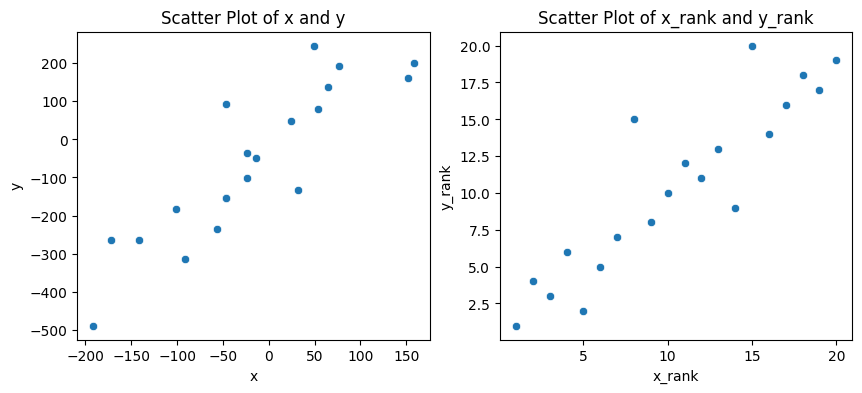

In [2]:
#서브플롯 생성
fig, ax = plt.subplots(1,2,figsize=(10,4))

#x,y 데이터 산점도
sns.scatterplot(
    data=df,
    x='x',
    y='y',
    ax=ax[0]
)
ax[0].set_title('Scatter Plot of x and y')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')

# x_rank, y_rank 데이터 산점도
sns.scatterplot(
    data=df,
    x='x_rank',
    y='y_rank',
    ax=ax[1]
)
ax[1].set_title('Scatter Plot of x_rank and y_rank')
ax[1].set_xlabel('x_rank')
ax[1].set_ylabel('y_rank')
plt.show()


Person 상관계수 계산 및 유의성 검정

In [3]:
#Pearson 상관계수 및 유의성 검정
from scipy.stats import pearsonr

pearson_corr, pearson_p = pearsonr(df['x'], df['y'])
print(f"Pearson 상관계수: {pearson_corr:.3f}, p-값: {pearson_p:.3f}")

if pearson_p < 0.05:
    print("Pearson 상관계수는 통계적으로 유의함.")
else:
    print("Pearson 상관계수는 통계적으로 유의하지 않음.")

Pearson 상관계수: 0.880, p-값: 0.000
Pearson 상관계수는 통계적으로 유의함.


Spearman 상관계수 계산 및 유의성 검정

In [6]:
spearman_corr, spearman_p = spearmanr(df['x_rank'], df['y_rank'])
print(f"Spearman 상관계수: {spearman_corr:.3f}, p-값: {spearman_p:.3f}")

if spearman_p < 0.05:
    print("Spearman 상관계수는 통계적으로 유의함.")
else:
    print("Spearman 상관계수는 통계적으로 유의하지 않음.")

Spearman 상관계수: 0.902, p-값: 0.000
Spearman 상관계수는 통계적으로 유의함.


Kendall 상관계수 계산 및 유의성 검정

In [7]:
kendall_corr, kendall_p = kendalltau(df['x_rank'], df['y_rank'])
print(f"Kendall 상관계수: {kendall_corr:.3f}, p-값: {kendall_p:.3f}")

if spearman_p < 0.05:
    print("Kendall 상관계수는 통계적으로 유의함.")
else:
    print("Kendall 상관계수는 통계적으로 유의하지 않음.")

Kendall 상관계수: 0.758, p-값: 0.000
Kendall 상관계수는 통계적으로 유의함.


# 여러 변수간의 상관분석

In [ ]:
# 필요한 라이브러리 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, kendalltau

#데이터 생성
np.random.seed(42)
x1 = np.random.normal(0, 100, 20)
x2 = x1 + 100
x3 = 2*x1 + np.random.normal(0, 100, 20)
x4 = -3*x1 + np.random.normal(0, 100, 20)
x5 = np.random.normal(0, 100, 20)
# 데이터프레임 생성
df = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3, 'x4': x4, 'x5': x5})

df.head()


,x1,x2,x3,x4,x5
0,49.671415,149.671415,245.907707,-75.167588,-47.917424
1,-13.826430,86.173570,-50.230490,58.616118,-18.565898
2,64.768854,164.768854,136.290528,-205.871390,-110.633497
3,152.302986,252.302986,162.131153,-487.019326,-119.620662
4,-23.415337,76.584663,-101.268947,-77.606187,81.252582


산점도 매트릭스 분석

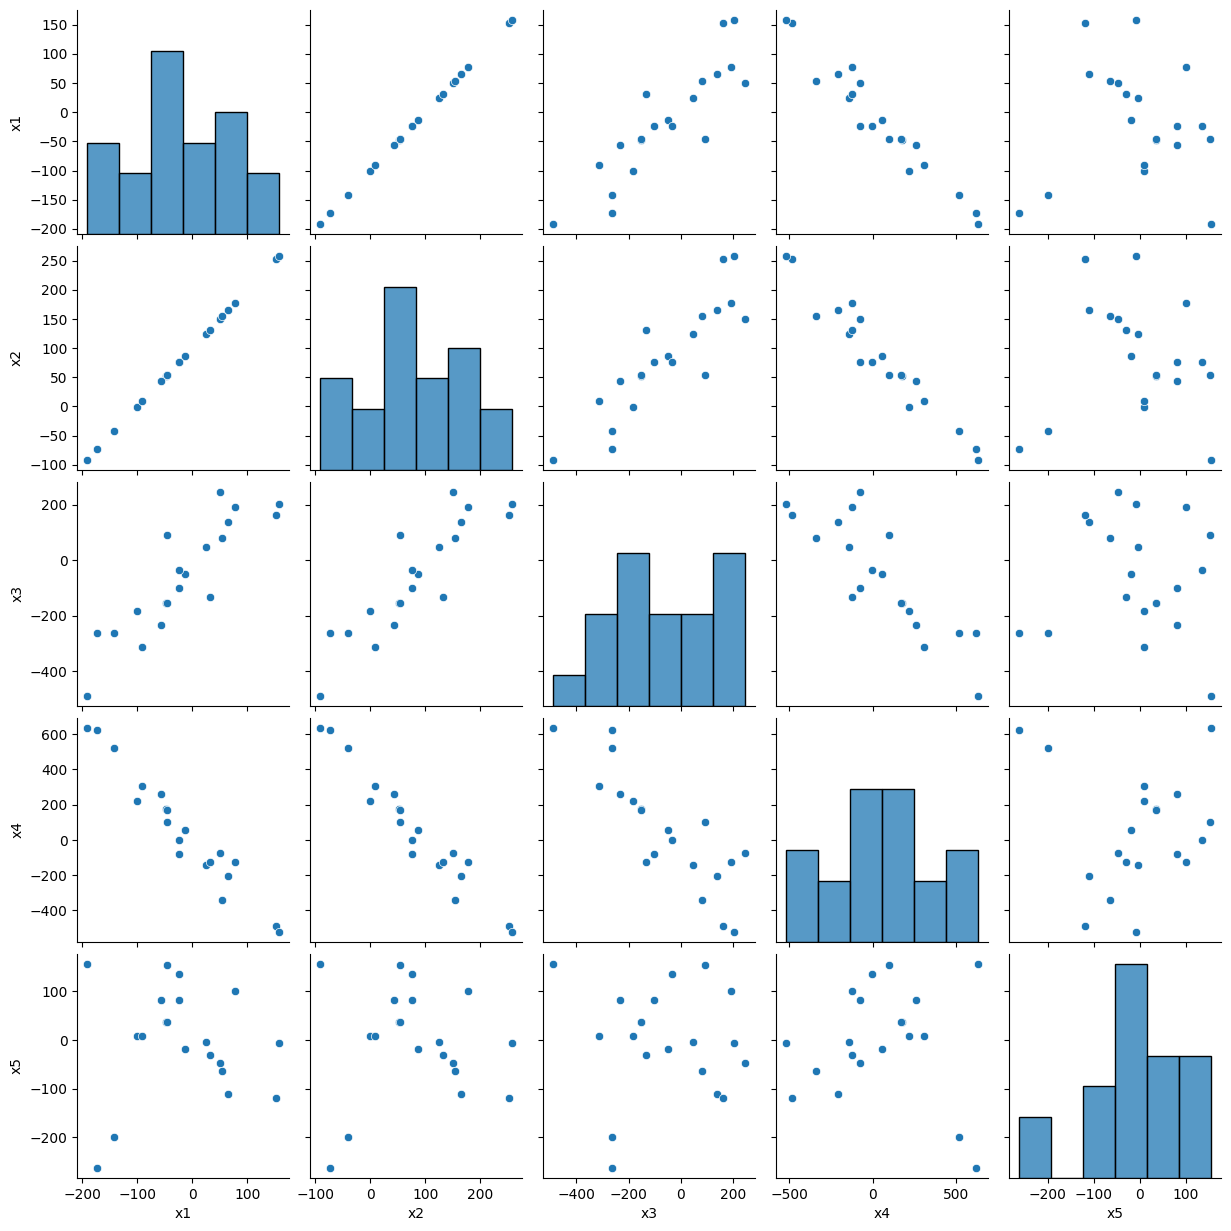

In [9]:
sns.pairplot(df)

# 상관계수 계산 및 히트맵 시각화
Person 상관계수

In [11]:
df.corr(method='pearson')

,x1,x2,x3,x4,x5
x1,1.000000,1.000000,0.879618,-0.971997,-0.025499
x2,1.000000,1.000000,0.879618,-0.971997,-0.025499
x3,0.879618,0.879618,1.000000,-0.848688,-0.051423
x4,-0.971997,-0.971997,-0.848688,1.000000,-0.021794
x5,-0.025499,-0.025499,-0.051423,-0.021794,1.000000


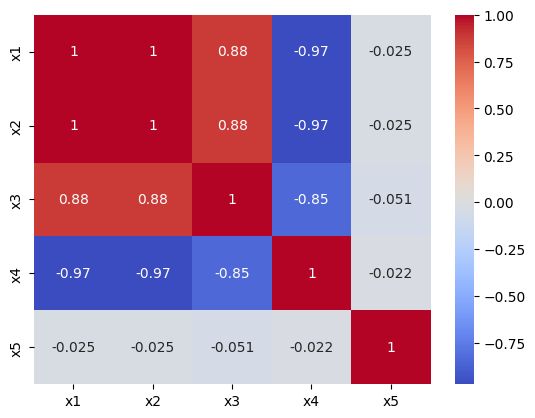

In [10]:
# Pearson 상관계수 계산
pearson_corr = df.corr(method='pearson')

#상관계수 히트맵 그리기
sns.heatmap(
    pearson_corr,   #상관계수 데이터
    annot=True, #각 셀에 숫자 표시
    cmap='coolwarm' #색설정
);

Spearman 상관계수

In [15]:
np.ones_like(spearman_corr,dtype=bool)

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

In [14]:
#우상단 삼각형 마스크 생성
np.triu(np.ones_like(spearman_corr, dtype=bool))

array([[ True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True],
       [False, False,  True,  True,  True],
       [False, False, False,  True,  True],
       [False, False, False, False,  True]])

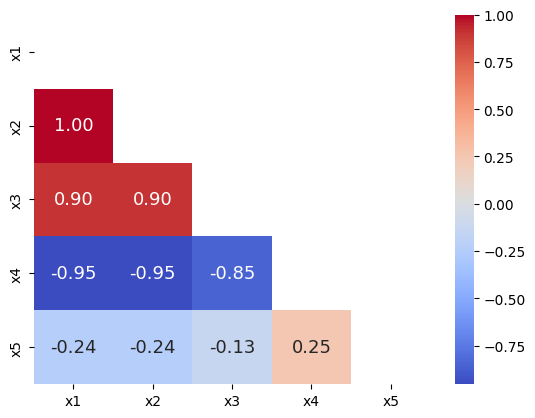

In [16]:
import numpy as np

# Spearman 상관계수 계산
spearman_corr = df.corr(method='spearman')

#우상단 삼각형 마스크 생성
mask = np.triu(np.ones_like(spearman_corr, dtype= bool))

# 상관계수 히트맵 그리기
sns.heatmap(
    spearman_corr,  # 상관계수 데이터
    annot=True, #각 셀에 숫자 표시
    cmap='coolwarm', # 색상 설정
    fmt='.2f',    # 숫자 형식
    annot_kws={'size': 13}, # 숫자 크기
    mask=mask   # 마스크 적용
);

kendall 상관계수

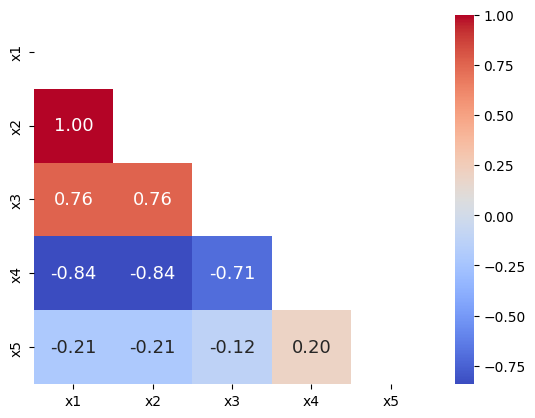

In [17]:
# kendall 상관계수 계산
spearman_corr = df.corr(method='kendall')

#우상단 삼각형 마스크 생성
mask = np.triu(np.ones_like(spearman_corr, dtype= bool))

# 상관계수 히트맵 그리기
sns.heatmap(
    spearman_corr,  # 상관계수 데이터
    annot=True, #각 셀에 숫자 표시
    cmap='coolwarm', # 색상 설정
    fmt='.2f',    # 숫자 형식
    annot_kws={'size': 13}, # 숫자 크기
    mask=mask   # 마스크 적용
);

# 연습

상관분석 프로세스
두 변수간의 상관분석

In [25]:
#필요한 라이브러리 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, kendalltau

#데이터 생성
np.random.seed(42)
x = np.random.normal(0, 50, 30)
y = 2*x + np.random.normal(0, 50, 30)

# 데이터프레임 생성
df = pd.DataFrame({'x': x, 'y': y})
#순위데이터 추가
df['x_rank'] = df['x'].rank()
df['y_rank'] = df['y'].rank()

df.head()

,x,y,x_rank,y_rank
0,24.835708,19.586085,24.0,20.0
1,-6.913215,78.787479,18.0,26.0
2,32.384427,64.093993,26.0,24.0
3,76.151493,99.417439,29.0,28.0
4,-11.707669,17.711908,15.0,18.0


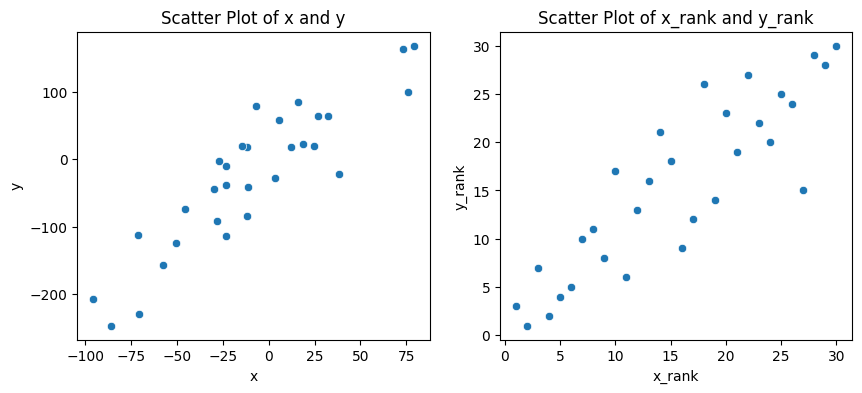

In [26]:
#서브플롯 생성
fig, ax = plt.subplots(1,2,figsize=(10,4))

#x,y 데이터 산점도
sns.scatterplot(
    data=df,
    x='x',
    y='y',
    ax=ax[0]
)
ax[0].set_title('Scatter Plot of x and y')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')

# x_rank, y_rank 데이터 산점도
sns.scatterplot(
    data=df,
    x='x_rank',
    y='y_rank',
    ax=ax[1]
)
ax[1].set_title('Scatter Plot of x_rank and y_rank')
ax[1].set_xlabel('x_rank')
ax[1].set_ylabel('y_rank')
plt.show()


In [27]:
#Pearson 상관계수 및 유의성 검정
from scipy.stats import pearsonr

pearson_corr, pearson_p = pearsonr(df['x'], df['y'])
print(f"Pearson 상관계수: {pearson_corr:.3f}, p-값: {pearson_p:.3f}")

if pearson_p < 0.05:
    print("Pearson 상관계수는 통계적으로 유의함.")
else:
    print("Pearson 상관계수는 통계적으로 유의하지 않음.")

Pearson 상관계수: 0.898, p-값: 0.000
Pearson 상관계수는 통계적으로 유의함.


In [28]:
#Spearman 상관계수 및 유의성 검정
spearman_corr, spearman_p = spearmanr(df['x_rank'], df['y_rank'])
print(f"Spearman 상관계수: {spearman_corr:.3f}, p-값: {spearman_p:.3f}")

if spearman_p < 0.05:
    print("Spearman 상관계수는 통계적으로 유의함.")
else:
    print("Spearman 상관계수는 통계적으로 유의하지 않음.")

Spearman 상관계수: 0.876, p-값: 0.000
Spearman 상관계수는 통계적으로 유의함.


In [29]:
#kendall 상관계수 및 유의성 검정
kendall_corr, kendall_p = kendalltau(df['x_rank'], df['y_rank'])
print(f"Kendall 상관계수: {kendall_corr:.3f}, p-값: {kendall_p:.3f}")

if spearman_p < 0.05:
    print("Kendall 상관계수는 통계적으로 유의함.")
else:
    print("Kendall 상관계수는 통계적으로 유의하지 않음.")

Kendall 상관계수: 0.715, p-값: 0.000
Kendall 상관계수는 통계적으로 유의함.


여러변수간 상관분석

In [30]:
# 필요한 라이브러리 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, kendalltau

#데이터 생성
np.random.seed(42)
a = np.random.normal(0, 50, 30)
b = a + 50
c = 3*a + np.random.normal(0, 50, 30)
d = -2*a + np.random.normal(0, 50, 30)
e = np.random.normal(0, 50, 30)
# 데이터프레임 생성
df = pd.DataFrame({'a': a, 'b': b, 'c': c, 'd': d, 'e': e})

df.head()


,a,b,c,d,e
0,24.835708,74.835708,44.421792,-73.630127,4.853877
1,-6.913215,43.086785,71.874264,4.543481,48.432250
2,32.384427,82.384427,96.478419,-120.085603,-35.102655
3,76.151493,126.151493,175.568932,-212.113317,-16.383107
4,-11.707669,38.292331,6.004239,64.041629,-19.605408


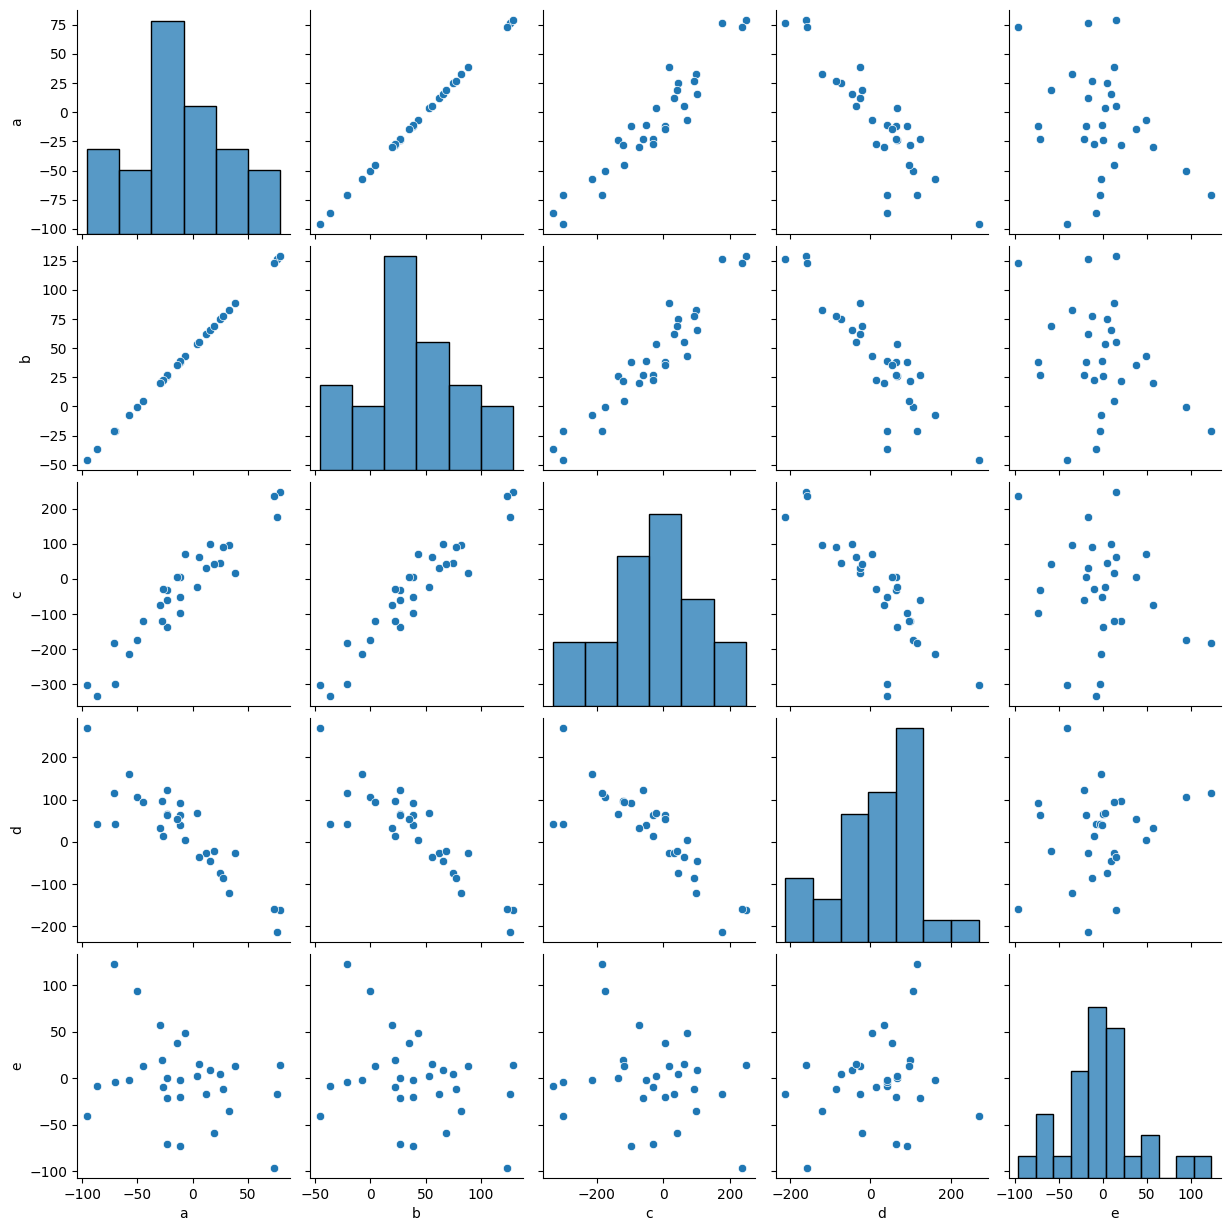

In [31]:
#산점도 매트릭스 분석
sns.pairplot(df)

# 상관계수 계산 및 히트맵 시각화

In [ ]:
#Person 상관계수
df.corr(method='pearson')

,a,b,c,d,e
a,1.000000,1.000000,0.949104,-0.877023,-0.307278
b,1.000000,1.000000,0.949104,-0.877023,-0.307278
c,0.949104,0.949104,1.000000,-0.827409,-0.229582
d,-0.877023,-0.877023,-0.827409,1.000000,0.199360
e,-0.307278,-0.307278,-0.229582,0.199360,1.000000


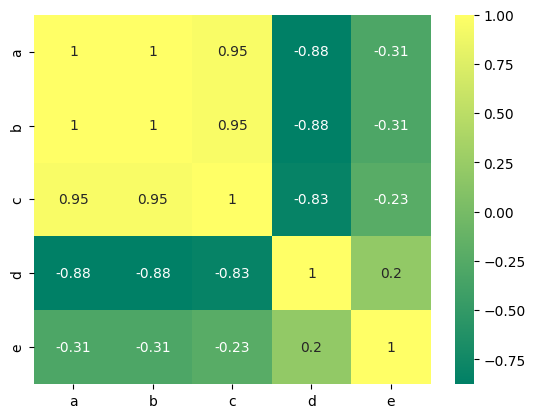

In [44]:
# Pearson 상관계수 계산
pearson_corr = df.corr(method='pearson')

#상관계수 히트맵 그리기
sns.heatmap(
    pearson_corr,   #상관계수 데이터
    annot=True, #각 셀에 숫자 표시
    cmap='summer' #색설정
);

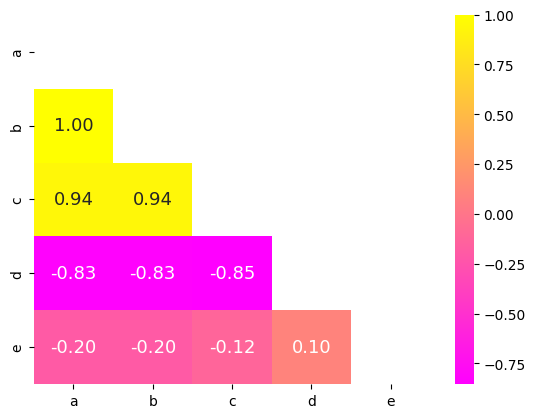

In [46]:
# Spearman 상관계수 계산
spearman_corr = df.corr(method='spearman')

#우상단 삼각형 마스크 생성
mask = np.triu(np.ones_like(spearman_corr, dtype= bool))

# 상관계수 히트맵 그리기
sns.heatmap(
    spearman_corr,  # 상관계수 데이터
    annot=True, #각 셀에 숫자 표시
    cmap='spring', # 색상 설정
    fmt='.2f',    # 숫자 형식
    annot_kws={'size': 13}, # 숫자 크기
    mask=mask   # 마스크 적용
);

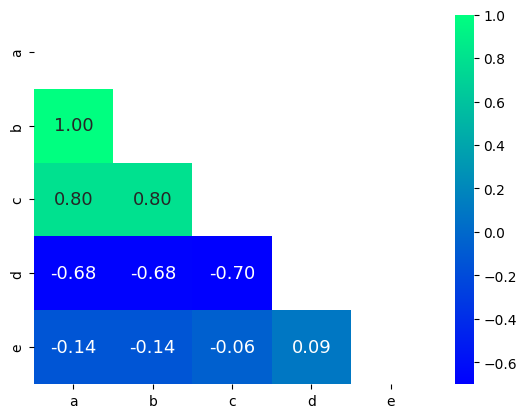

In [45]:
# kendall 상관계수 계산
spearman_corr = df.corr(method='kendall')

#우상단 삼각형 마스크 생성
mask = np.triu(np.ones_like(spearman_corr, dtype= bool))

# 상관계수 히트맵 그리기
sns.heatmap(
    spearman_corr,  # 상관계수 데이터
    annot=True, #각 셀에 숫자 표시
    cmap='winter', # 색상 설정
    fmt='.2f',    # 숫자 형식
    annot_kws={'size': 13}, # 숫자 크기
    mask=mask   # 마스크 적용
);